<a href="https://colab.research.google.com/github/ewapajak/ML/blob/main/homework07_gradient_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment: Understanding Binary Cross-Entropy in the Forward Stagewise Procedure
-----------------------------
## The Problem

In this assignment, you will demonstrate that adding a new constant predictor in the forward stagewise procedure to an already existing predictor from a previous stage, $f_{m-1}(x_i)$ (which we will denote as $f_i$ for ease of notation), may be for certain loss functions fundamentally more challenging than building a constant predictor from scratch. You will work with the binary cross-entropy loss defined as

$$
L(y, z) = -y \log(\sigma(z)) - (1 - y) \log(1 - \sigma(z)),
$$

where

- $y_i \in \{0,1\}$ are the binary labels,
- $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid function.

For the purposes of this assignment, assume that you are given:

- A dataset of binary labels $y_i$.
- **Two constants: $m$ (the number of ones) and $k$ (the number of zeros)** in the labels in the dataset.
- A set of predictions $f_i = f_{m-1}(x_i)$ obtained from a previous stage, where the $f_i$ values are generated randomly from a normal distribution.

### Scenario A: Fitting a Constant Predictor from Scratch

In this scenario, you are building a predictor from scratch. The task is to find the optimal constant value $\lambda$ that minimizes the binary cross-entropy loss over the dataset. Formulate the optimization problem as:

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda).
$$


- Derive explicitly the optimal $\lambda$ for fitting from scratch, i.e., solve
    
    $$
    \lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda)
    $$
    
    and express the answer in terms of $m$ and $k$.
    *Hint:* First, write the derivative of the loss with respect to $\lambda$ and set it to zero to obtain an implicit equation.

We want to find the value $\lambda$ such that the Loss Function is minimized:<br><br>

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda)
$$<br>

Substituting our loss function (binary cross-entropy) we get:<br><br>

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda) = \arg\min_{\lambda} \sum_{i=1}^{n}-y_{i} \log(\sigma(\lambda)) - (1 - y_{i}) \log(1 - \sigma(\lambda))
$$<br>

Now, in order to find the $\lambda^*$ we compute the derivative of $ \sum_{i=1}^{n}-y_{i} \log(\sigma(\lambda)) - (1 - y_{i}) \log(1 - \sigma(\lambda)) $ and set the expression to zero.

But first, let's compute the derivative of the sigmoid function:<Br><Br>

$$
\sigma(\lambda) = \frac{1}{1 + e^{-\lambda}}
$$


the derivative:<br><br>


$$
\frac{d}{d\lambda}\sigma(\lambda) = \frac{d}{d\lambda} \left( \frac{1}{1+e^{-\lambda}} \right) = \frac{d}{d\lambda}\sigma(\lambda) = \frac{e^{-\lambda}}{(1+e^{-\lambda})^2}
$$ <br>

Notice that we can express $\sigma(\lambda)$ and $1-\sigma(\lambda)$ as: <br><br>
$$
\sigma(\lambda) = \frac{1}{1+e^{-\lambda}}, \qquad 1-\sigma(\lambda)=\frac{e^{-\lambda}}{1+e^{-\lambda}}.
$$ <br>
Thus, we can rewrite the derivative as:<br><br>
$$
\frac{d}{d\lambda}\sigma(\lambda)=\sigma(\lambda)(1-\sigma(\lambda)).
$$ <br>

The derivative of the loss function: <br><br>

$$
\frac{dL}{d\lambda} = -y \cdot \frac{1}{\sigma(\lambda)} \cdot \frac{d}{d\lambda}\sigma(\lambda) - (1-y) \cdot \frac{1}{1-\sigma(\lambda)} \cdot \left(-\frac{d}{d\lambda}\sigma(\lambda)\right) = \left( -\frac{y}{\sigma(\lambda)} + \frac{1-y}{1-\sigma(\lambda)} \right) \cdot \frac{d}{d\lambda}\sigma(\lambda).
$$
<br>
Substituting the derivative of the sigmoid:<br><br>

$$
\frac{dL}{d\lambda} = \left( -\frac{y}{\sigma(\lambda)} + \frac{1-y}{1-\sigma(\lambda)} \right) \cdot \sigma(\lambda)(1-\sigma(\lambda))= -y\bigl(1-\sigma(\lambda)\bigr) + (1-y)\sigma(\lambda) = \sigma(\lambda) - y
$$<br>

Therefore:

$$
\sum_{i=1}^{n}(\sigma(\lambda) - y_{i}) = \sum_{i=1}^{n}(\frac{1}{1+e^{-\lambda}} - y_{i}) =  0
$$ <br>

Solving this equation we get: <br>

$$
\lambda^* = \log(\frac{\sum_{i=1}^{n}y_{i}}{n - \sum_{i=1}^{n}y_{i}}) = \log(\frac{m}{n-m}) = \log(\frac{m}{k}) = \log(\frac{\frac{m}{n}}{1-\frac{m}{n}}) = \sigma^{-1}(\frac{m}{n})
$$ <br>

Where, as stated above, $m$ is the number of ones, $k$ - the number of zeros, and $n$ the total number of observations.


  - **Interpretation:**
  Provide a clear interpretation of your derived optimal $\lambda$. What does this constant represent in terms of the dataset's label distribution?

We can interpret the  $\lambda^* = \log(\frac{m}{k})$ as the log-odds of a positive (=1) outcome in our dataset.


### Scenario B: Fitting the m-th Predictor in the Forward Stagewise Procedure

Now assume you already have an existing predictor $f_i = f_{m-1}(x_i)$. Rather than predicting from scratch, you wish to find an optimal additive correction $\lambda$ such that the updated prediction for each data point becomes

$$
 f_i + \lambda,
$$

and the corresponding binary cross-entropy loss is given by

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
$$

- Derive the implicit equation that $\lambda$ must satisfy in the additive shift scenario:
    
    $$
    \lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
    $$
    *Hint:* First, write the derivative of the loss with respect to $\lambda$ and set it to zero to obtain an implicit equation.

Similarly to scenario A, we want to find a value lambda minimizing the following:

$$\sum_{i=1}^{n} L(y_i, f_i + \lambda)$$<br>

Substituting our loss function:<br><br>

$$\sum_{i=1}^{n} L(y_i, \lambda) =  \sum_{i=1}^{n}-y_{i} \log(\sigma(\lambda + f_{i})) - (1 - y_{i}) \log(1 - \sigma(\lambda + f_{i})) $$ <br>

Again, in order to find a value minimizing the expression, we compute the derivative of the loss function and set it to zero:

The only difference is that our sigmoid function is shifted by $f_{i}$, hence our result:<br><br>

$$\frac{d}{d\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda) = \sum_{i=1}^{n} \left( \sigma(f_i + \lambda) - y_i \right)$$
<br>

Setting the derivative to zero we get:<br><br>

$$\sum_{i=1}^{n} \sigma(f_i + \lambda) = \sum_{i=1}^{n}y_{i} = m
$$
 <br>
$$\sum_{i=1}^{n}\frac{1}{1+e^{-(\lambda + f_{i})}} = m$$

- **Discussion:**
    Explain clearly why this implicit equation has no simple closed-form solution, unlike the previous case. What role does the non-linearity of the sigmoid function (in the binary cross-entropy loss) play in this difficulty?

Unlike in Scenario A, where the sigmoid function $\sigma(z) = \frac{1}{1+e^{-z}}$ was applied to a constant $\lambda$ (making the optimization problem easier), Scenario B introduces a non-linearity that depends on the data. Here, the sigmoid is applied to $\lambda + f_i$, and since $f_i$ varies across samples, we can't “extract” $\lambda$ from the expression easily.

This makes the loss function in Scenario B non-linear and dependent on the distribution of $f_i$ values. As a result, we can no longer solve for $\lambda$ explicitly as we did in Scenario A. Nevertheless we can solve this equation numerically, for examples using gradient descent.




2. **Loss Landscape Exploration (Python)**

  Write a Python code that:

  - Uses provided values for $n$, and for $k$ and $m$ (the number of zeros and ones in the labels, respectively), $k+m=n$.
  - Generates a set of predictions $f_i$ by sampling from a normal distribution.
  - Plots the binary cross-entropy loss as a function of $\lambda$ for:
    - Scenario A:
      $$
      \text{plot } \sum_{i=1}^{n} L(y_i, \lambda) \text{ as a function of }\lambda
      $$
    - Scenario B:
      $$
      \text{plot } \sum_{i=1}^{n} L(y_i, f_i + \lambda) \text{ as a function of }\lambda
      $$
  - **Discussion:**
  Is the loss landscape in Scenario A simpler or more complex than in Scenario B? Is it multimodal or unimodal? If so, is it thinkable the lambda minimizer in Scenario B can be found numerically? Where does the difficulty in Scenario B come from: the non-linearity of the problem or a complex loss landscape?

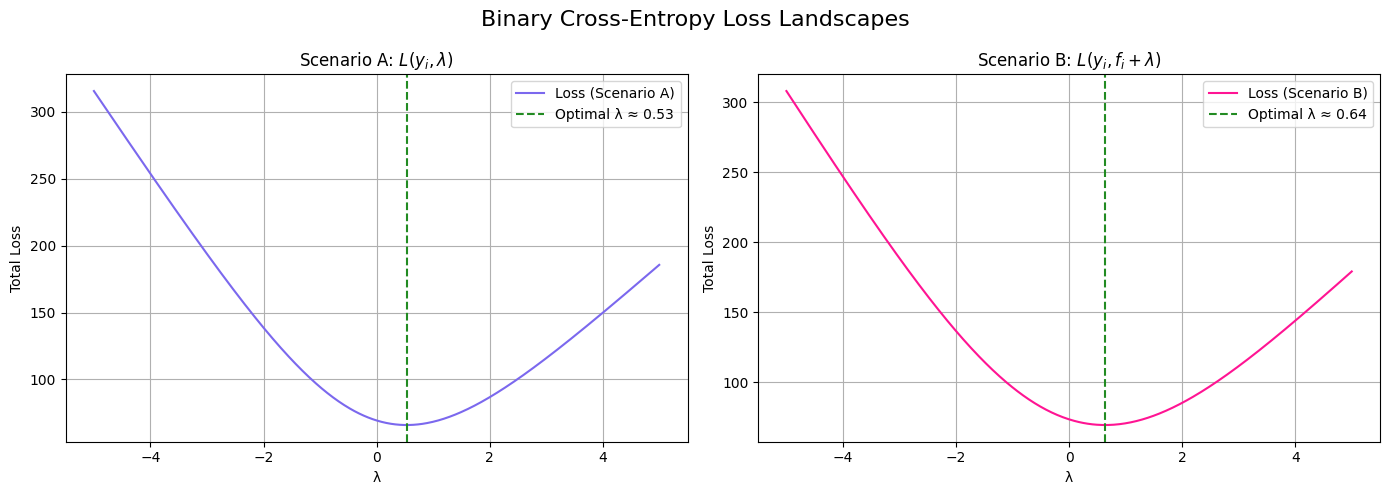

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from scipy.optimize import minimize_scalar

def binary_cross_entropy(y, pred):
    eps = 1e-9
    pred = np.clip(pred, eps, 1 - eps)
    return -y * np.log(pred) - (1 - y) * np.log(1 - pred)

# Total samples
n = 100


k = 37  # Number of zeros
m = 63  # Number of ones
assert k + m == n


y = np.array([0]*k + [1]*m)

# Random predictions from normal distribution
np.random.seed(7)
f = np.random.normal(loc=0, scale=1, size=n)


lambda_vals = np.linspace(-5, 5, 500)

# Scenario A: L(y_i, λ)
loss_scenario_a = [np.sum(binary_cross_entropy(y, expit(l))) for l in lambda_vals]
lambda_opt_a = lambda_vals[np.argmin(loss_scenario_a)]

# Scenario B: L(y_i, f_i + λ)
loss_scenario_b = [np.sum(binary_cross_entropy(y, expit(f + l))) for l in lambda_vals]
res_b = minimize_scalar(lambda l: np.sum(binary_cross_entropy(y, expit(f + l))))
lambda_opt_b = res_b.x

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Binary Cross-Entropy Loss Landscapes", fontsize=16)

# Scenario A
axs[0].plot(lambda_vals, loss_scenario_a, label="Loss (Scenario A)", color="mediumorchid")
axs[0].axvline(lambda_opt_a, color='forestgreen', linestyle='--', label=f"Optimal λ ≈ {lambda_opt_a:.2f}")
axs[0].set_title("Scenario A: $L(y_i, \lambda)$")
axs[0].set_xlabel("λ")
axs[0].set_ylabel("Total Loss")
axs[0].legend()
axs[0].grid(True)

# Scenario B
axs[1].plot(lambda_vals, loss_scenario_b, label="Loss (Scenario B)", color="deeppink")
axs[1].axvline(lambda_opt_b, color='forestgreen', linestyle='--', label=f"Optimal λ ≈ {lambda_opt_b:.2f}")
axs[1].set_title("Scenario B: $L(y_i, f_i + \lambda)$")
axs[1].set_xlabel("λ")
axs[1].set_ylabel("Total Loss")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()
